# 허유림 201858068
## 과제 #4 : Classification

#### HW4.csv 파일은 은행 마케팅 데이터로서, 은행 고객의 정보(age, job, marital, education, default, balance, housing, load)와 캠페인(정기예금 유치 마케팅)과 관련된 정보(contact, day, month, duration, campaign, pdays, previous, poutcome), 그리고 마지막으로 정기예금 유치결과(y)를 저장하고 있다. y를 레이블로 하는 분류 문제에 대하여 아래의 순서로 분석을 실행하시오.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) 파일을 읽어 데이터프레임을 생성한 후, 분석에 적절하지 않은 day와 month 칼럼은 삭제하시오. 수치형 특성의 이름과 범주형 특성의 이름의 리스트를 출력하시오.

In [5]:
df = pd.read_csv('HW4.csv',sep=";") #데이터프레임 만들기

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [7]:
df2 = df.drop(['day','month'], axis = 1) #데이터프레임 삭제

In [8]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,211,3,other,no


In [11]:
cat_feature = [name for name in list(df2.columns) if df2[name].dtype=='object' and name != 'y']
num_feature = [name for name in list(df2.columns) if name not in cat_feat and name != 'y']

In [12]:
cat_feature #범주형 특성

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [13]:
num_feature #수치형 특성

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

### 2) 레이블의 범주별 비율을 구하시오.

In [9]:
df2['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [15]:
df2['y'].value_counts()/len(df2) #df.y.value_counts() / df.shape[0]

no     0.88476
yes    0.11524
Name: y, dtype: float64

### 3) 수치형 특성의 요약통계(평균, 표준편차 등)와 범주형 특성의 막대 그래프를 구하시오.

In [16]:
num_feature_des = df2.describe() #수치형 특성의 요약통계
num_feature_des

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


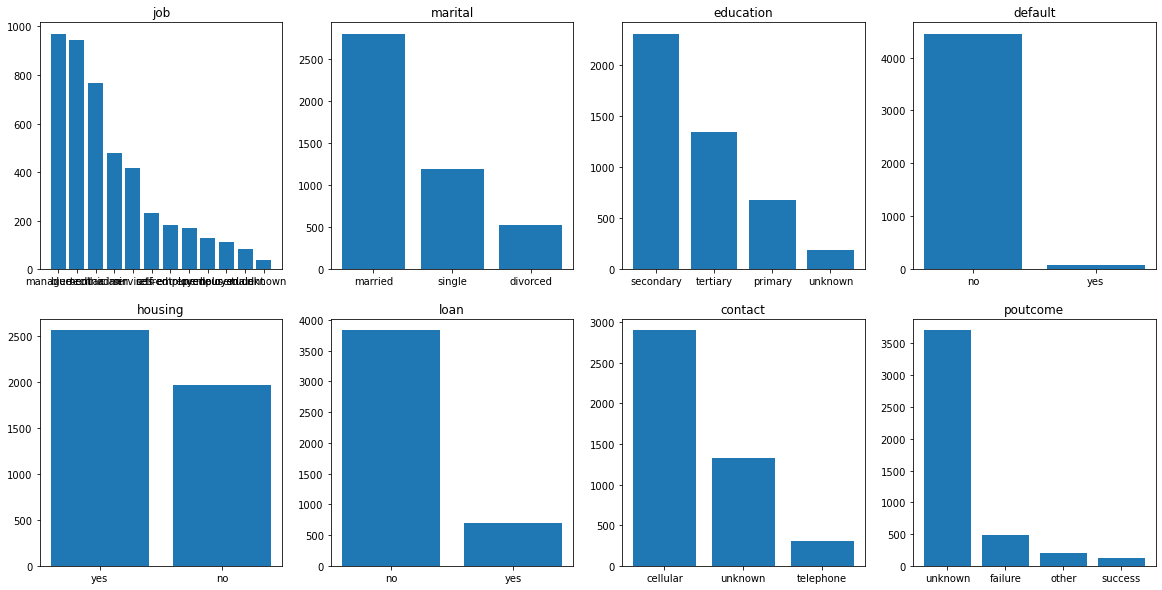

In [19]:
plt.figure(figsize=(20,10)) #범주형 특성의 막대 그래프
i = 1
for name in cat_feature:
    counts = df2[name].value_counts()
    plt.subplot(2,4,i)
    # c = (np.random.random(), np.random.random(), np.random.random())
    # plt.bar(counts.index, counts.values, color=c) 그래프 랜덤 색상
    plt.bar(counts.index, counts.values)
    plt.title(name)
    i = i + 1

### 4) 특성행렬을 만든 후 범주형 특성은 원-핫-인코딩한 데이터프레임(4521rows×38columns)을 구하시오. 그리고 레이블에 대하여 'yes'는 0으로 'no'는 1로 인코딩하시오.

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [21]:
matrix = df2.drop('y', axis=1) #특성행렬 만들기
label = df2['y']

In [25]:
y = np.where(label =='no', 1, 0) #레이블에 대한 'yes'는 0으로 'no'는 1로 인코딩
y

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
y[50:100]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0])

In [27]:
feature_dummies = pd.get_dummies(matrix) #원-핫-인코딩한 데이터프레임
feature_dummies

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4517,57,-3313,153,1,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4518,57,295,151,11,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4519,28,1137,129,4,211,3,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [28]:
X = feature_dummies.to_numpy()

### 5) 데이터를 훈련용과 테스트용으로 8:2로 분할한 후, 표준화하시오.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=0)
# 훈련용과 테스트용으로 8:2로 분할

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)#표준화
X_test_std = scaler.transform(X_test)

#### 6) cross_val_score 함수(cv=5)를 사용하여 로지스틱 회귀의 초모수 C의 값을 [0.01, 0.1, 1,10, 100]로 바꾸어 가며 최적값을 구한 후, 이 값을 사용한 테스트 스코어를 구하시오. 테스트 데이터에 대한 정오분류표를 작성하고 정기예금에 가입하지 않은 고객의 정밀도와 재현율을 구한 후 그 의미를 기술하시오.

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [43]:
#로지스틱 회귀 모형 튜닝
c_list = [0.01, 0.1, 1, 10, 100]
best_score = 0
for k in c_list: 
    scores_logistic = cross_val_score(estimator=LogisticRegression(C=k, random_state=1), 
                                  X=X_train_std, y=y_train, cv=5, n_jobs=-1) 
    score = np.mean(scores_logistic) 
    print('C =', k, 'accuracy =', score) 
    if score > best_score: 
        best_score = score
        best_parameters = {'C':k}
print(best_score)
print(best_parameters)
logistic = LogisticRegression(**best_parameters, random_state=1)
logistic.fit(X_train_std, y_train)
logistic.score(X_test_std, y_test) 

C = 0.01 accuracy = 0.8990612319754246
C = 0.1 accuracy = 0.9015485660576328
C = 1 accuracy = 0.9009953157118513
C = 10 accuracy = 0.9007186905389606
C = 100 accuracy = 0.9007186905389606
0.9015485660576328
{'C': 0.1}


0.8917127071823204

In [44]:
#최적 로지스틱 회귀 모형 평가
y_pred = logistic.predict(X_test_std)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 32,  72],
       [ 26, 775]], dtype=int64)

In [46]:
precision_score(y_test, y_pred)  #775/847  #고객의 정밀도

0.9149940968122786

In [47]:
recall_score(y_test, y_pred)  #775/801 #재현율

0.9675405742821473

#### 7) GridSearchCV(cv=5)를 사용하여 결정트리의 최적 최대 깊이(1~10)를 구하고, 이 값을 사용한 테스트 스코어를 구하시오. 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'max_depth': range(1, 11)}

In [50]:
gscv = GridSearchCV( estimator=DecisionTreeClassifier(random_state=1), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [51]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(1, 11)}, scoring='accuracy')

In [52]:
print(gscv.best_params_)
print('테스트 스코어 =', gscv.score(X_test, y_test)) 

{'max_depth': 6}
테스트 스코어 = 0.8983425414364641


#### 8) StandardScaler, PCA(n_componetns=5), SVC(kernel='rbf')를 순서대로 연결한 파이프라인을 생성한 후, C와 gamma의 값들을 [0.01, 0.1, 1, 10, 100]으로 바꾸면서 GridSearchCV(cv=5)를 사용하여 최적 C와 gamma를 구하시오. 이 모형의 테스트 스코어는 얼마인가?

In [53]:
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),PCA(n_components=5), SVC(kernel='rbf', random_state=1))
p_list = [0.01, 0.1, 1, 10, 100]
param_grid = {'svc__C':p_list, 'svc__gamma':p_list}
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)
print('테스트 스코어 =', gs.score(X_test, y_test)) 

{'svc__C': 10, 'svc__gamma': 0.1}
테스트 스코어 = 0.887292817679558
